In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### EDA

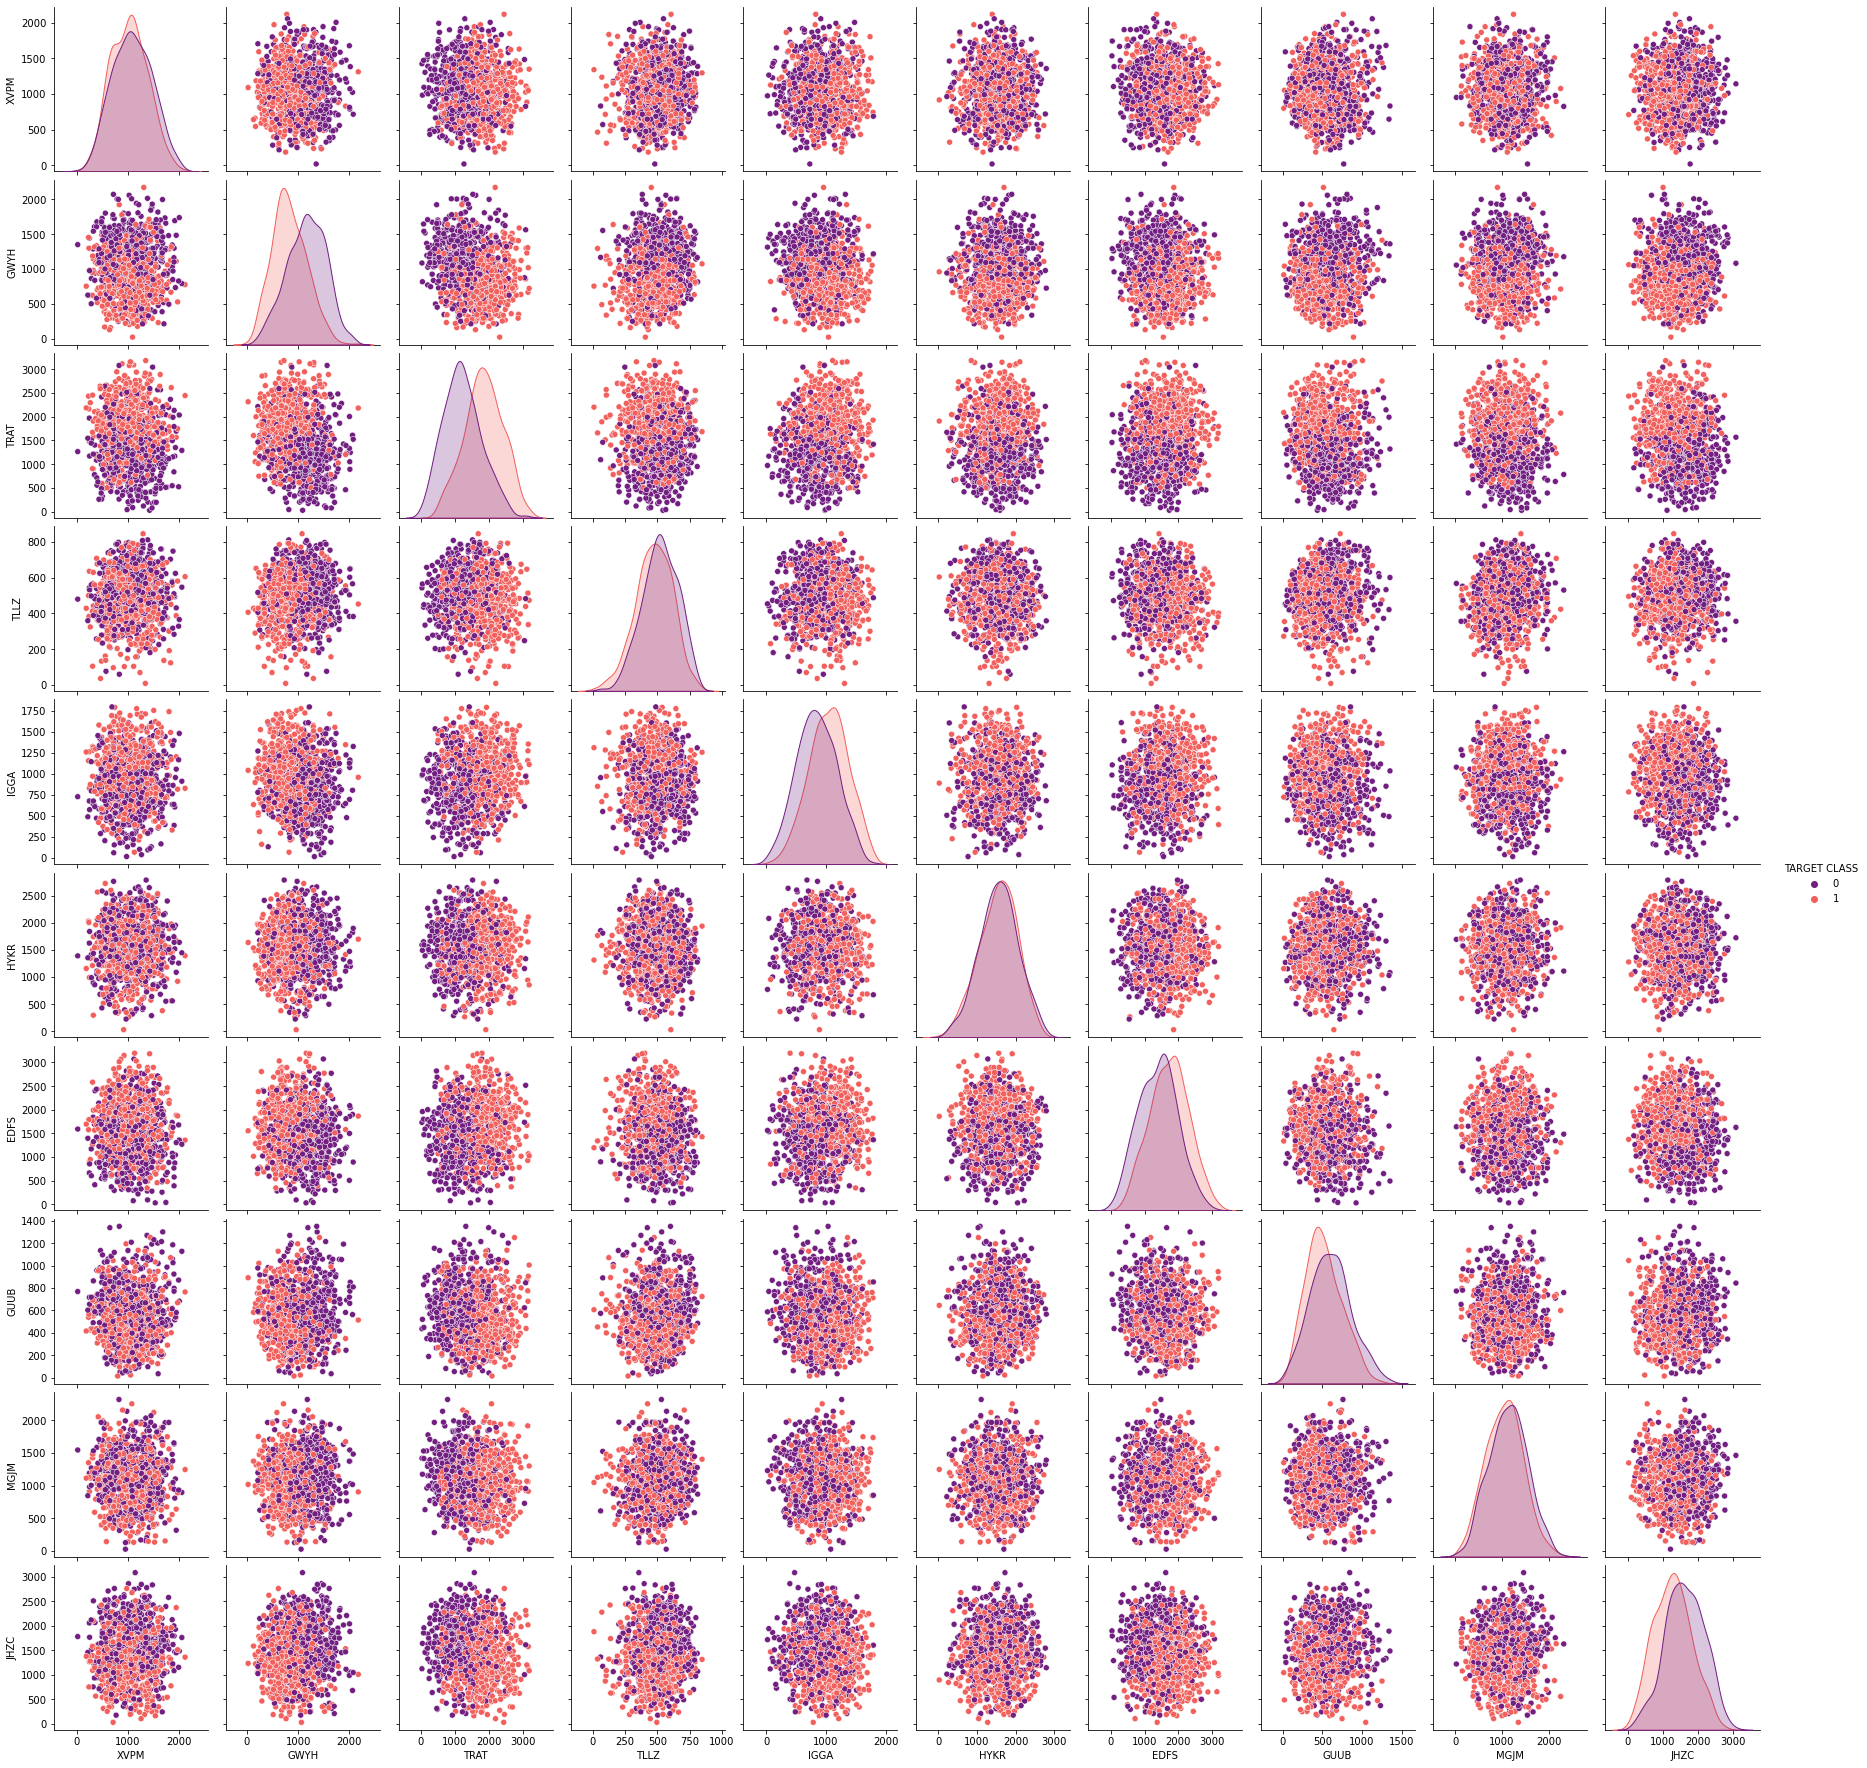

In [6]:
sns.pairplot(data = df, hue = 'TARGET CLASS', palette = 'magma')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [11]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [12]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### EDA

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df_feat
Y = df['TARGET CLASS']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [17]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
pred = knn.predict(X_test)

### Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print("\t\t\tEvaluation\n\nClassification Report\n")
print(classification_report(Y_test, pred))
print("\nConfusion Matrix\n")
print(confusion_matrix(Y_test, pred))

			Evaluation

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       156
           1       0.72      0.69      0.70       144

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300


Confusion Matrix

[[118  38]
 [ 45  99]]


### Choosing a good K value

In [21]:
error_rate = []
for i in range(1 , 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

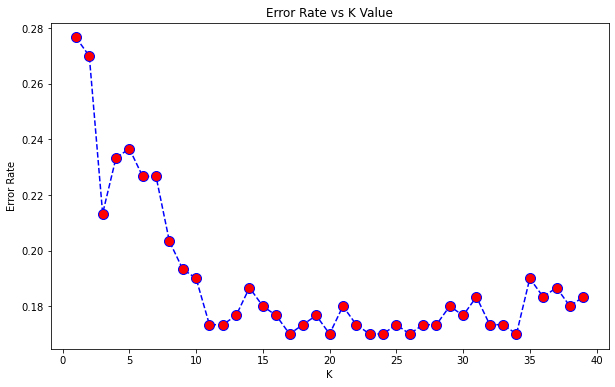

In [22]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We have taken k = 15

In [23]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [24]:
print('Classification Report\n')
print(classification_report(Y_test, pred))
print('\n\nConfusion Matrix\n')
print(confusion_matrix(Y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       156
           1       0.81      0.82      0.81       144

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Confusion Matrix

[[128  28]
 [ 26 118]]


#### Much better results!